In [54]:
import pygrib

In [55]:
grbs = pygrib.open('/Users/satyamsharma/Documents/CAPSTONE/Project/DATA/model/namanl_218_20171229_1800_000.grb2') 

In [56]:
grbs.seek(2)

In [57]:
grbs.tell()

2

In [58]:
grb = grbs.read(1)[0]

In [59]:
grb

3:Maximum/Composite radar reflectivity:dB (instant):lambert:unknown:level 0 200:fcst time 0 hrs:from 201712291800

In [60]:
grbs.tell()

3

In [61]:
grbs.seek(0)

In [62]:
grb.values

array([[-20.       , -20.       , -20.       , ..., -20.       ,
        -20.       , -20.       ],
       [-20.       , -20.       , -20.       , ..., -20.       ,
        -20.       , -20.       ],
       [-20.       , -20.       , -20.       , ..., -20.       ,
        -20.       , -20.       ],
       ...,
       [-20.       , -20.       , -20.       , ...,   4.16     ,
          2.28     ,  -3.01     ],
       [-20.       , -20.       , -20.       , ...,  -5.38     ,
          2.28     ,  -1.9399999],
       [-20.       , -20.       , -20.       , ...,   0.07     ,
          0.07     ,  -1.9399999]], dtype=float32)

In [63]:
temp_surf = grbs.select(name="Temperature")[0].values
temp_surf

array([[205.39998, 205.29997, 205.29997, ..., 205.39998, 205.39998,
        205.39998],
       [205.39998, 205.39998, 205.39998, ..., 205.59998, 205.49998,
        205.49998],
       [205.39998, 205.39998, 205.39998, ..., 205.59998, 205.59998,
        205.49998],
       ...,
       [219.99998, 219.99998, 219.99998, ..., 219.39998, 219.39998,
        219.39998],
       [219.99998, 219.99998, 219.99998, ..., 219.39998, 219.39998,
        219.39998],
       [219.99998, 219.99998, 220.09998, ..., 219.29997, 219.29997,
        219.39998]], dtype=float32)

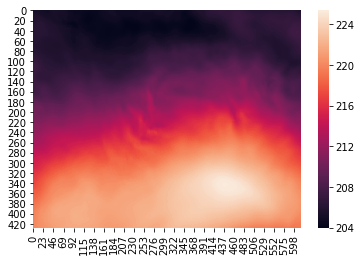

In [64]:
ax = sns.heatmap(temp_surf, cbar='true')

In [76]:
import pygrib
from matplotlib import pyplot as plt
from matplotlib import colors
import numpy as np
from mpl_toolkits.basemap import Basemap

%matplotlib inline

In [88]:
for grb in grbs[:5]:
    print grb

1:Pressure reduced to MSL:Pa (instant):lambert:meanSea:level 0:fcst time 0 hrs:from 201712291800
2:Derived radar reflectivity:dB (instant):lambert:hybrid:level 1:fcst time 0 hrs:from 201712291800
3:Maximum/Composite radar reflectivity:dB (instant):lambert:unknown:level 0 200:fcst time 0 hrs:from 201712291800
4:Visibility:m (instant):lambert:surface:level 0:fcst time 0 hrs:from 201712291800
5:Visibility:m (instant):lambert:cloudTop:level 0:fcst time 0 hrs:from 201712291800


In [80]:
print grb.keys()

[u'parametersVersion', u'UseEcmfConventions', u'GRIBEX_boustrophedonic', u'hundred', u'globalDomain', u'GRIBEditionNumber', u'tablesVersionLatest', u'grib2divider', u'angularPrecision', u'missingValue', u'ieeeFloats', u'isHindcast', u'section0Length', u'identifier', u'discipline', u'editionNumber', u'totalLength', u'sectionNumber', u'section1Length', u'numberOfSection', u'centre', u'centreDescription', u'subCentre', u'tablesVersion', u'masterDir', u'localTablesVersion', u'significanceOfReferenceTime', u'year', u'month', u'day', u'hour', u'minute', u'second', u'dataDate', u'julianDay', u'dataTime', u'productionStatusOfProcessedData', u'typeOfProcessedData', u'selectStepTemplateInterval', u'selectStepTemplateInstant', u'stepType', u'setCalendarId', u'deleteCalendarId', u'is_uerra', u'sectionNumber', u'grib2LocalSectionPresent', u'sectionNumber', u'gridDescriptionSectionPresent', u'section3Length', u'numberOfSection', u'sourceOfGridDefinition', u'numberOfDataPoints', u'numberOfOctectsForN

In [99]:
lats, lons = grb.latlons()  # get the lats and lons for the grid.
print 'min/max lat and lon',lats.min(), lats.max(), lons.min(), lons.max()

min/max lat and lon 12.190000000000017 61.30935757335814 -152.87862250405013 -49.415986585644376


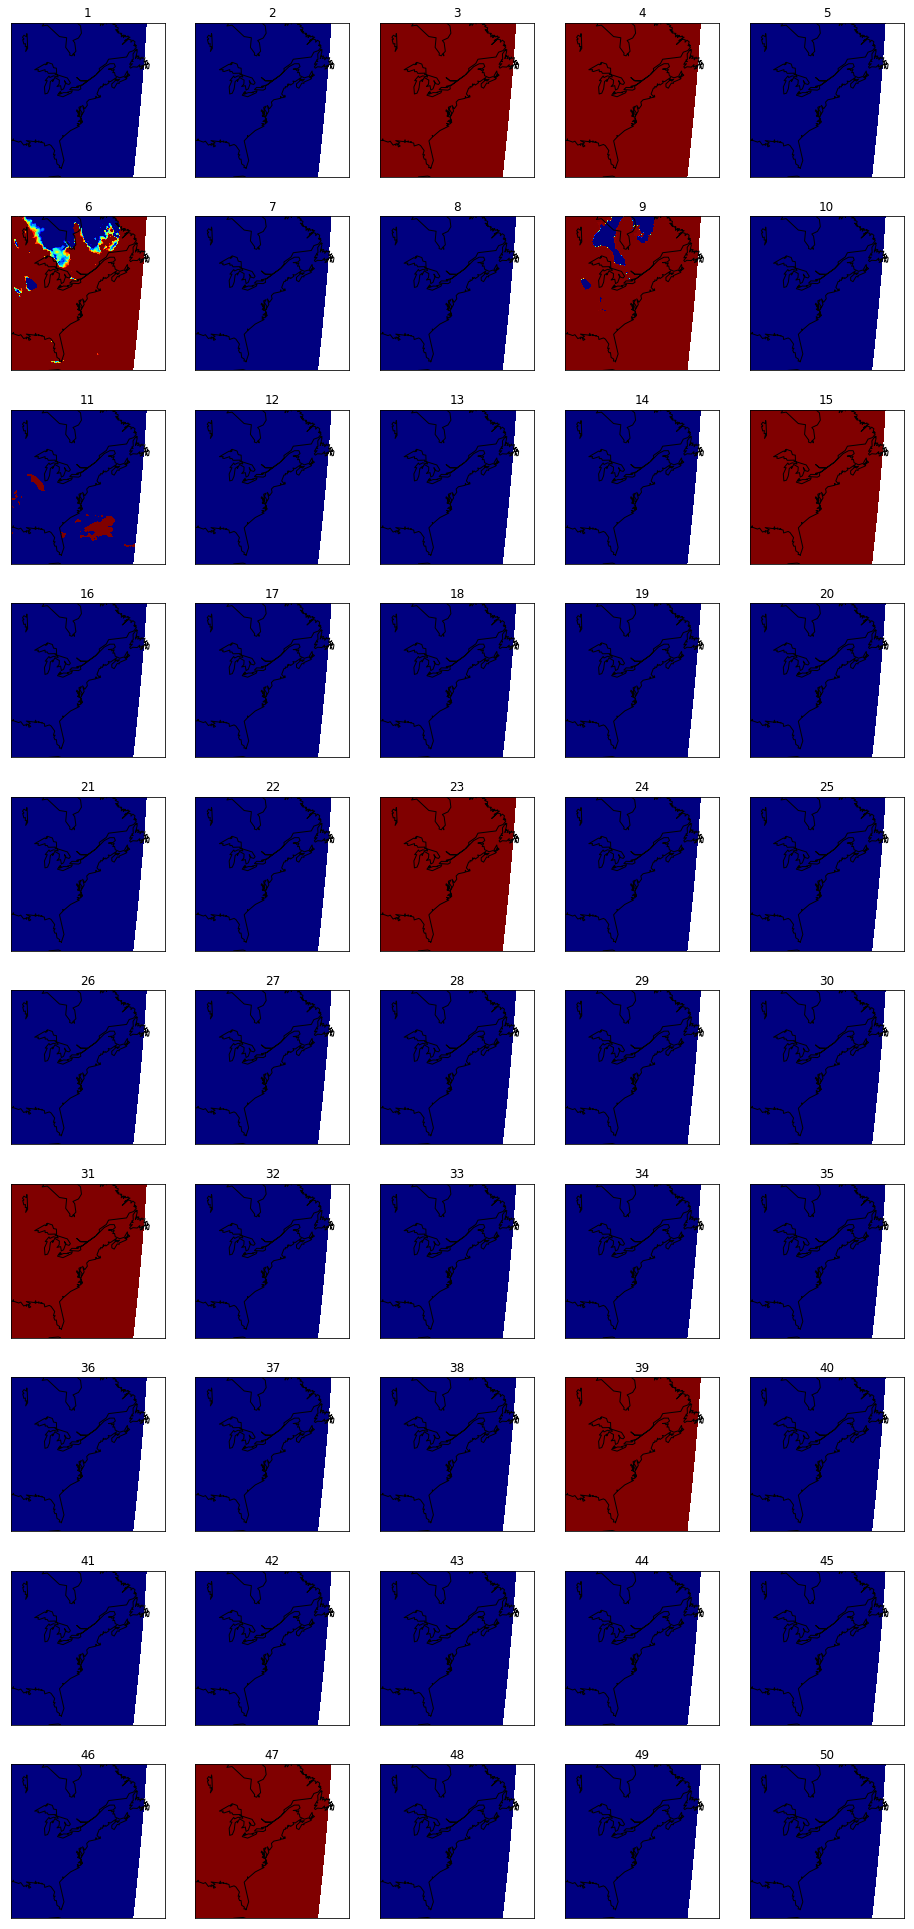

In [101]:
fig = plt.figure(figsize=(16,35))
m = Basemap(projection='lcc',lon_0=-74,lat_0=41,width=4.e6,height=4.e6)
x,y = m(lons,lats)
for nens in range(1,51):
    ax = plt.subplot(10,5,nens)
    m.drawcoastlines()
    cs = m.contourf(x,y,t2mens[nens],np.linspace(230,300,41),cmap=plt.cm.jet,extend='both')
    t = plt.title(nens)